In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
from salishsea_tools import evaltools as et
import datetime as dt
%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as fm:
    print(fm.variables.keys())
    tmask=fm.variables['tmask'][0,:,:,:]
    z=fm.variables['gdept_1d'][:]
    e1e2t=fm.variables['e1t'][:,:,:]*fm.variables['e2t'][:,:,:]

dict_keys(['nav_lon', 'nav_lat', 'nav_lev', 'time_counter', 'tmask', 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f', 'ff', 'mbathy', 'misf', 'isfdraft', 'e3t_0', 'e3u_0', 'e3v_0', 'e3w_0', 'gdept_0', 'gdepu', 'gdepv', 'gdepw_0', 'gdept_1d', 'gdepw_1d', 'e3t_1d', 'e3w_1d'])


In [3]:
f0=nc.Dataset('/data/eolson/results/MEOPAR/SS36runs/GrahamRuns/testT3_3/SalishSea_1h_20150401_20150410_ptrc_T_20150401-20150410.nc')

In [4]:
f0.variables.keys()

dict_keys(['nav_lat_grid_T', 'nav_lon_grid_T', 'bounds_nav_lon_grid_T', 'bounds_nav_lat_grid_T', 'area_grid_T', 'deptht', 'deptht_bounds', 'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_nav_lon_grid_W', 'bounds_nav_lat_grid_W', 'area_grid_W', 'depthw', 'depthw_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'TUR1', 'TUR2', 'TUR3', 'TUR4', 'TUR5', 'TUR6', 'TUR7', 'RIVTRN2', 'avt', 'woce', 'E1E2TA', 'E1E2TASP', 'BIOSINK1', 'ZWNBIO1', 'ZWN1', 'SFTURB', 'vosaline'])

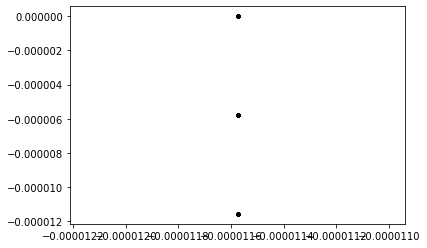

In [5]:
plt.plot(-1/(24*3600)*np.ones(np.shape(f0.variables['woce'][1,:,414,200:])),f0.variables['BIOSINK1'][1,:,414,200:],'k.');

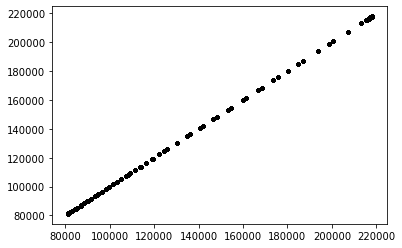

In [6]:
plt.plot(np.ones(np.shape(f0.variables['woce'][1,:,414,200:]))*e1e2t[0,414,200:],f0.variables['E1E2TASP'][1,:,414,200:],'k.');

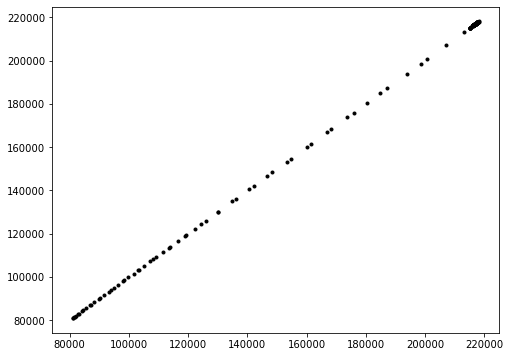

In [7]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(e1e2t[0,414,200:],f0.variables['E1E2TA'][1,414,200:],'k.');

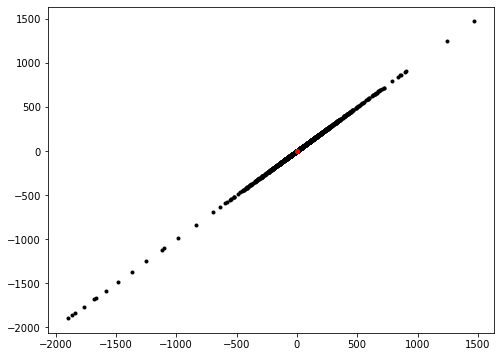

In [8]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(f0.variables['woce'][1,:,414,200:]*e1e2t[:,414,200:],f0.variables['ZWN1'][1,:,414,200:],'k.');
ax.plot(f0.variables['woce'][1,0,414,200:]*e1e2t[0,414,200:],f0.variables['ZWN1'][1,0,414,200:],'r.');

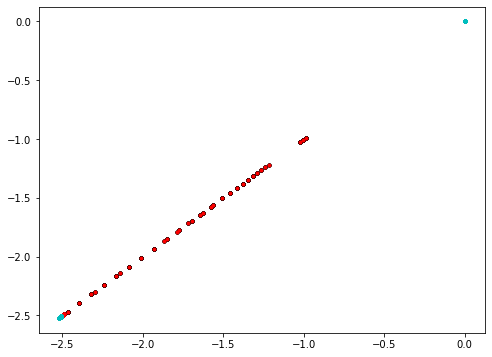

In [9]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(-1/(24*3600)*np.ones(np.shape(f0.variables['woce'][1,:,414,200:]))*e1e2t[:,414,200:]*tmask[:,414,200:],
        f0.variables['ZWNBIO1'][1,:,414,200:]*tmask[:,414,200:],'k.');
ax.plot(-1/(24*3600)*np.ones(np.shape(f0.variables['woce'][1,0,414,200:]))*e1e2t[0,414,200:]*tmask[0,414,200:],
        f0.variables['ZWNBIO1'][1,0,414,200:]*tmask[0,414,200:],'r.');
ax.plot(-1/(24*3600)*np.ones(np.shape(f0.variables['woce'][1,20,414,200:]))*e1e2t[0,414,200:]*tmask[20,414,200:],
        f0.variables['ZWNBIO1'][1,20,414,200:]*tmask[20,414,200:],'c.');

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(-1/(24*3600)*np.ones(np.shape(f0.variables['woce'][1,:,414,200:]))*e1e2t[:,414,200:],
        f0.variables['BIOSINK1'][1,:,414,200:]*f0.variables['E1E2TASP'][1,:,414,200:],'k.');

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(9,6))
m=ax[0].pcolormesh(f0.variables['ZWN1'][1,:,414,200:])
ax[0].set_ylim(40,0)
plt.colorbar(m,ax=ax[0])
m=ax[1].pcolormesh(f0.variables['woce'][1,:,414,200:])
ax[1].set_ylim(40,0)
plt.colorbar(m,ax=ax[1])
#plt.plot(f0.variables['ZVN1'][1,:,414,200:],f0.variables['woce'][1,:,414,200:],'k.');

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(9,6))
m=ax[0].pcolormesh(f0.variables['ZWNBIO1'][1,:,414,200:])
ax[0].set_ylim(40,0)
plt.colorbar(m,ax=ax[0])
m=ax[1].pcolormesh(f0.variables['ZWNBIO1'][1,:,414,200:]-f0.variables['ZWN1'][1,:,414,200:])
ax[1].set_ylim(40,0)
plt.colorbar(m,ax=ax[1])
#plt.plot(f0.variables['ZVN1'][1,:,414,200:],f0.variables['woce'][1,:,414,200:],'k.');

for var in ('TUR1','TUR2', 'TUR3', 'TUR4', 'TUR5', 'TUR6', 'TUR7', 'TUR8', 'TUR9',):
    print(np.max(np.abs(f0.variables[var][-1,0,:,:]-f0.variables['TUR10'][-1,0,:,:])))

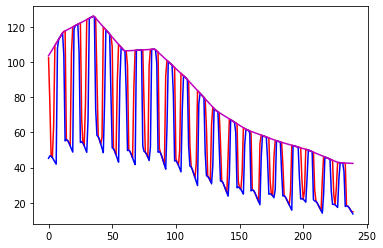

In [11]:
plt.plot(f0.variables['TUR1'][:,3,415,345],'r-')
plt.plot(f0.variables['TUR2'][:,3,415,345],'b-')
plt.plot(f0.variables['SFTURB'][:,415,345],'m-')

In [ ]:
plt.pcolormesh(f0.variables['TUR10'][-1,0,:,:],vmin=0,vmax=15)
plt.colorbar()

In [ ]:
plt.pcolormesh(f1.variables['TUR1'][-1,0,:,:],vmin=0,vmax=15)
plt.colorbar()

In [ ]:
plt.pcolormesh(f1.variables['TUR2'][-1,0,:,:],vmin=0,vmax=15)
plt.colorbar()

In [ ]:
np.shape(f0.variables['TUR1'][-1,:,414,200:])

In [ ]:
plt.pcolormesh(np.arange(0,198).T,-1*z.T,np.ma.masked_where(tmask[:,414,200:]==0,f0.variables['TUR1'][-1,:,414,200:]),vmin=0,vmax=5)
plt.colorbar()
plt.ylim(-50,0)

In [ ]:
plt.pcolormesh(np.arange(0,198).T,-1*z.T,np.ma.masked_where(tmask[:,414,200:]==0,f0.variables['TUR7'][-1,:,414,200:]),vmin=0,vmax=5)
plt.colorbar()
plt.ylim(-50,0)

In [ ]:
plt.pcolormesh(np.arange(0,198).T,-1*z.T,np.ma.masked_where(tmask[:,414,200:]==0,f0.variables['TUR10'][-1,:,414,200:]),vmin=0,vmax=5)
plt.colorbar()
plt.ylim(-50,0)

In [ ]:
np.max(f1.variables['TUR1'][0,0,:,:])

In [ ]:
plt.pcolormesh(f0.variables['TUR1'][8,0,:,:])
plt.colorbar()

In [ ]:
plt.pcolormesh(f1.variables['TUR5'][-1,0,:,:])
plt.colorbar()

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(12,12))
m=ax.pcolormesh(f1.variables['TUR2'][0,0,370:450,300:])
fig.colorbar(m)
ax.plot(40,44,'r*')

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
m=ax.pcolormesh(np.ma.masked_where(tmask[0,360:470,250:]==0,f0.variables['TUR1'][-1,0,360:470,250:]))
fig.colorbar(m)

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
m=ax.pcolormesh(np.ma.masked_where(tmask[0,360:470,250:]==0,f0.variables['TUR2'][-1,0,360:470,250:]))
fig.colorbar(m)

In [ ]:
with nc.Dataset('/results/forcing/rivers/turbidity_201906/riverTurbDaily201906_y2015m03d31.nc') as ft:
    print(np.max(ft.variables['turb']))
with nc.Dataset('/results/forcing/rivers/turbidity_201906/riverTurbDaily201906_y2015m04d01.nc') as ft:
    print(np.max(ft.variables['turb']))
with nc.Dataset('/results/forcing/rivers/turbidity_201906/riverTurbDaily201906_y2015m04d02.nc') as ft:
    print(np.max(ft.variables['turb']))
with nc.Dataset('/results/forcing/rivers/turbidity_201906/riverTurbDaily201906_y2015m04d10.nc') as ft:
    print(np.max(ft.variables['turb']))
with nc.Dataset('/results/forcing/rivers/turbidity_201906/riverTurbDaily201906_y2015m04d15.nc') as ft:
    print(np.max(ft.variables['turb']))
with nc.Dataset('/results/forcing/rivers/turbidity_201906/riverTurbDaily201906_y2015m04d18.nc') as ft:
    print(np.max(ft.variables['turb']))
with nc.Dataset('/results/forcing/rivers/turbidity_201906/riverTurbDaily201906_y2015m04d19.nc') as ft:
    print(np.max(ft.variables['turb']))
with nc.Dataset('/results/forcing/rivers/turbidity_201906/riverTurbDaily201906_y2015m04d20.nc') as ft:
    print(np.max(ft.variables['turb']))
with nc.Dataset('/results/forcing/rivers/turbidity_201906/riverTurbDaily201906_y2015m04d30.nc') as ft:
    print(np.max(ft.variables['turb']))

In [ ]:
plt.pcolormesh(f1.variables['vosaline'][0,0,:,:])
plt.colorbar()

In [ ]:
plt.pcolormesh(f1.variables['vosaline'][-1,0,:,:])
plt.colorbar()

In [ ]:
plt.pcolormesh(f0.variables['TUR1'][0,:,430,200:],vmin=0,vmax=5)
plt.colorbar()

In [ ]:
plt.pcolormesh(f2.variables['TUR1'][9,:,430,200:],vmin=0,vmax=.5)
plt.colorbar()

In [ ]:
plt.pcolormesh(f1.variables['TUR1'][29,:,430,200:],vmin=0,vmax=.5)
plt.colorbar()

In [ ]:
plt.pcolormesh(f1.variables['TUR1'][9,:,430,345:],vmin=0,vmax=.5)
plt.colorbar()

In [ ]:
ftype='riverTurbDaily2'
basedir='/data/eolson/results/MEOPAR/SS36runs/GrahamRuns/riverTurbGraham/'
nam_fmt='forcing'
flen=1
tres=24
f0turbind=et.index_model_files(dt.datetime(2015,4,1),dt.datetime(2015,4,10),basedir,nam_fmt,flen,ftype,tres)

In [ ]:
xx=0
for ifile in f0turbind['paths']:
    with nc.Dataset(ifile) as ff:
        plt.plot(xx,ff.variables['turb'][0,415,345],'kx')
    xx=xx+24
plt.plot(f0.variables['TUR1'][:,0,415,345],'r-')
plt.plot(f1.variables['TUR1'][:,0,415,345],'b-')

In [ ]:
xx=0
for ifile in f0turbind['paths']:
    with nc.Dataset(ifile) as ff:
        plt.plot(xx,ff.variables['turb'][0,415,345],'kx')
    xx=xx+24
plt.plot(f0.variables['TUR1'][:,10,415,345],'r-')
plt.plot(f1.variables['TUR1'][:,10,415,345],'b-')